`Dummy Regressor` helps in creating a baseline model for regression. <br>
we can either set it to `mean`, `median`, `quantile` (can be specified) or  `constant` (can be specified)

* LinearRegression() uses normal equation 
* SGDRegressor() uses iterative optimization --> uses stochastic gradient descent and used for large data (>10k)


### SGDRegressor 
#### hyperparameter
* **Loss :** it has two types of loss as hyperparameter. `squared error` and `huber` (used tyo make linear regressor robust to the outliers).
* **Penalty :** it has different penalty like `l1`, `l2`, `elasticnet`.
* **Learning rate :** learning rate can be `constant`, `optimal`, `invscaling` and `adaptive`. By default it uses invscaling.
* **Early stopping** : stopping criteria or `early_stopping` can be True or False.

#### Feature scaling for SGDRegressor 
SGDRegressor is sensitive to feature scaling. 

> * Feature scaling is not needed for word freq and indicator features as they have intrinsic scale. 
> * Feature extracted using PCA should be scaled by some constant c such that the avg L2 norm of the training data equals one.

#### Shufle 
`SGDRegressor(shuffle = True)` will shuffle the training data after each epoch. default True 

##### WHY?
In Stochastic Gradient Descent (SGD) and its variants like `SGDRegressor`, shuffling the training data after each epoch is recommended for several important reasons:

1. **Avoiding Bias**: When training a machine learning model, the order in which you present training examples to the model can have an impact on the model's performance. If you feed the examples to the model in a specific order, it may start to learn and adapt primarily to the patterns in that order, which can introduce bias into the model. Shuffling the data helps break any potential patterns or biases in the order of examples.

2. **Promoting Generalization**: Shuffling the training data at the beginning of each epoch ensures that the model is exposed to a diverse set of examples in each epoch. This diversity helps the model generalize better because it prevents the model from memorizing the specific order of the examples. Generalization is crucial for the model's ability to make accurate predictions on new, unseen data.

3. **Converging Faster**: Shuffling the data introduces randomness into the training process. This randomness can help the optimization algorithm escape local minima and converge faster to a global minimum of the loss function. Without shuffling, the optimizer might get stuck in a suboptimal solution.

4. **Reducing Overfitting**: By shuffling the data, you make it less likely that the model will overfit to specific patterns or outliers in the training data. Overfitting occurs when a model becomes too specialized in capturing the noise or idiosyncrasies of the training data, which results in poor generalization to new data.

5. **Ensuring Fairness**: In some cases, the data might be ordered in a way that represents a particular class distribution or pattern that changes over time. Shuffling the data ensures that each class or pattern has an equal chance to be represented in each epoch, which can be important for fairness and balanced learning.

##### Learning Rate : 


##### invscaling : 

* default setting for learning rate is `invscaling` and we use `eta0 = 1e-2` and `power_t = 0.25` which can be optimized to speed up or slow down the learning process 

* SGDRegressor uses different learning rate in different iterations. 
Learning rate reduces after every itertion and the learning rate is defined by `eta = eta0/pow(t, power_t)` t is the current iteration. 

```py
from sklearn.linear_model import SGDRegressor

# Set the initial learning rate (eta0) and power_t
sgd_regressor = SGDRegressor(eta0=0.01, power_t=0.5, max_iter=1000, tol=1e-3)

# Fit the model to your training data
sgd_regressor.fit(X_train, y_train)

# Make predictions or evaluate the model
predictions = sgd_regressor.predict(X_test)

```
`eta` is the current learning rate for the particular iteration. for t = 1 `eta = eta0`

`eta0` is the initial learning rate which remains constant. 
* speed up : initialize with a large value 
* slow down : inititalize with a small value. 

power_t is the power of t. t = 1, 2, 3, ... 
* speed up : initialize with a small value 
* slow down : initialize with a large value

In [4]:
# speed up training 
initial_learning_rate = 0.01 # et0 
powert_t = 0.1

for i in range(10) : 
    eta = (initial_learning_rate/ pow(i+1, powert_t))
    print(eta)

0.01
0.009330329915368075
0.008959584598407623
0.008705505632961241
0.008513399225207847
0.008359588020779369
0.008231712539930443
0.008122523963562354
0.008027415617602307
0.007943282347242816


In [6]:
# slow down training 
initial_learning_rate = 0.01 # et0 
powert_t = 0.75

for i in range(10) : 
    eta = (initial_learning_rate/ pow(i+1, powert_t))
    print(eta)

0.01
0.005946035575013606
0.004386913376508308
0.0035355339059327372
0.002990697562442441
0.0026084743001221454
0.002323680802425408
0.0021022410381342864
0.0019245008972987524
0.0017782794100389228


##### constant : 
keeps the learning rate constant through out all iterations 
##### adaptive : 
* learning rate to kept to initial value as long as the loss keep decreasing.
* once the stopping criteria is hit learning rate is divided by 5 and the training loop continues.
* algo stops when learning rate goes below 10^-6

#### Max iterations 
* `max_itr` is number of epochs. By default its 1000. 

> **Practical Tip** : 
> Its observed that SGD converges after observing approx 10^6 training samples. <br>
> so the best guess for `max_itr` = np.ceil(10^6/n), where n is the number of samples in training set 

In [16]:
import numpy as np 

for i in range(6) : 
    trainig_data_len = 100 * pow(10, i)
    max_itr = np.ceil(pow(10, 6)/trainig_data_len)
    print(f'reasonable guess for max_itr for {trainig_data_len} samples --> {max_itr}')

reasonable guess for max_itr for 100 samples --> 10000.0
reasonable guess for max_itr for 1000 samples --> 1000.0
reasonable guess for max_itr for 10000 samples --> 100.0
reasonable guess for max_itr for 100000 samples --> 10.0
reasonable guess for max_itr for 1000000 samples --> 1.0
reasonable guess for max_itr for 10000000 samples --> 1.0


### How to set stopping criteria in SGDRegressor? 

* Option 1 : `tol = 1e-3`, `n_iter_no_change = 5`, `max_iter = 500` it stops 
    * when the training loss does  n't improve (loss > best_loss - tol) for n_iter_no_change consecutive epochs 
    * else after a max num of iteration `max_iter`

* Option 2 : `early_stoppin = True`, `validation_fraction = 0.2` along with the prev parameters, it stops 
    * when validation_score doesn't improve by at least tol for n_iter_no_change consecutive epochs 
    * else after a max num of iteration `max_iter` 

### Avgeraged SGD
updating weight just based on the last sample weight can be a bit unstable so we can take avg of previous weights to make it more stable and it helps avoiding the local minima trap. 

* `average = True` gives the avg weights from prev updates 
* `average = 10` gives the avg weights from prev updates starting after 10 samples, works best with large num of features and high value of `eta0` 

sometimes we do multiple runs of SGD and we want to use the value of the prev weight vector as initialization for the next SGD run. `warm_start = True` does the same. By default its Flase. 

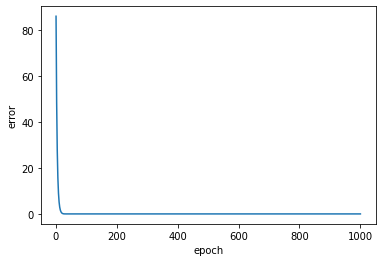

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import  mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt  

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


sgd_reg = SGDRegressor(
    max_iter= 1, tol = -np.infty, warm_start= True, 
    penalty = None, learning_rate = 'constant', eta0 = 0.0005
)

error = []
epoch_ = [i+1 for i in range(1000)]
for epoch in range(1000) : 
    # in each iteration the we use the value of weight from the prev itr to start with 
    sgd_reg.fit(X_train, y_train) 
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_absolute_error(y_val, y_val_predict)
    error.append(val_error)

sns.lineplot(x = epoch_, y = error);
plt.xlabel('epoch');
plt.ylabel('error');

## Model evaluation : 
`.coef_` gives coefficients of regression and `.intercept_` gives the intercept and this works for all regression methods 

* training error or empirical error 
* test error or generalization error 

`lr.score(x_test, y_test)` gives the R2 score 

common evaluation matrix 
* `mean_absolute_error` 
* `mean_squarred_error` 
* `r2_score` 

special evaluation matrix 
* `mean_squared_log_error` useful for targets with exponential growths like population --> penalizes under-estimation heavier than the over-estimation
* `mean_absolute_percentage_error` --> sensitive to relative error 
* `median_absolute_error` --> robust to outliers
* `max_error` --> worst case error (only used in single output regression, doesn't support multi-output regression)

> * For scores higher is better 
> * For error lower is better 

to convert error metric to score metric use `neg_` as suffix


### cross validation 
In case, we get comparable performance on train and test with a specific split, is this performance guranteed on other splits???

* If the test set is small then test error obtained is unstable and would not reflect the true error on larger test set 
* if only easier samples are kept aside as test set then this would lead to optimistic estimation of the true test error 

To avoid this we use cross validation. It creates multiple train and test sets and train on different sets and this way we ensure robust performance evaluation.

* KFold --> k-1 for training and 1 for test 
```
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
```

* RepeatedKfold --> repeats the KFold 
* LeaveOneOut --> will leave exactly one out as test 
* ShuffleSplit --> Shuffles the training data before splitting --> robust for class distribution so even if the class distributions are not uniform it works well 

```
ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]
```

for different scoring methods we use `cross_validate` class and pass different `scoring` parameters to it and you can also pass a list of scores to be considered. 


### Learning curve 
helps us to study the effect of #samples on training and test errors. we can plot this and check.

### Overfitting/Underfitting 
1. fit linear model with diff num of features 
2. for each model, obtain training and test errors 
3. plot #features vs error graph - one each for training and test error 
4. examine the graphs to detect underfitting/overfitting 